## Analysis of google reviews

In [1]:
import pandas as pd

### import data and drop columns 

In [117]:
df = pd.read_csv("../raw_data/reviews.csv", header=None)

df.columns = ["Index", "Restaurant", "Reviewer", "Score", "When", "Review"]

df.drop(columns=["Index", "Reviewer", "When"], inplace=True)

In [147]:
df.head()

,Restaurant,Score,Review
0,Darshan Nepal,"Classificação: 4,5 de 5,","(Traduzido pelo Google) Muito boa comida, boa ..."
1,Darshan Nepal,"Classificação: 4,0 de 5,",(Traduzido pelo Google) Voe para Lisboa se sen...
2,Darshan Nepal,"Classificação: 3,5 de 5,",(Traduzido pelo Google) Comida deliciosa e uma...
3,Darshan Nepal,"Classificação: 3,0 de 5,","(Traduzido pelo Google) Muito boa comida, boa ..."
4,Darshan Nepal,"Classificação: 2,5 de 5,",(Traduzido pelo Google) Voe para Lisboa se sen...


In [156]:
df.shape

(90732, 3)

In [159]:
df.drop_duplicates()

,Restaurant,Score,Review
0,Darshan Nepal,"Classificação: 4,5 de 5,","(Traduzido pelo Google) Muito boa comida, boa ..."
1,Darshan Nepal,"Classificação: 4,0 de 5,",(Traduzido pelo Google) Voe para Lisboa se sen...
2,Darshan Nepal,"Classificação: 3,5 de 5,",(Traduzido pelo Google) Comida deliciosa e uma...
3,Darshan Nepal,"Classificação: 3,0 de 5,","(Traduzido pelo Google) Muito boa comida, boa ..."
4,Darshan Nepal,"Classificação: 2,5 de 5,",(Traduzido pelo Google) Voe para Lisboa se sen...
...,...,...,...
90662,Spice Hut Tandoori,"Classificação: 5,0 de 5,",(Traduzido pelo Google) Discreto e caro\n\n(Or...
90663,Spice Hut Tandoori,"Classificação: 4,0 de 5,",(Traduzido pelo Google) O melhor em qualidade ...
90665,Spice Hut Tandoori,"Classificação: 4,0 de 5,",(Traduzido pelo Google) Tratamento impecável e...
90666,Spice Hut Tandoori,"Classificação: 5,0 de 5,",(Traduzido pelo Google) Super bom chefe\n\n(Or...


In [148]:
df.shape

(90732, 3)

In [153]:
df.Restaurant.c

AttributeError: 'Series' object has no attribute 'uniques'

In [118]:
cleaned_df = df.dropna()

### Score column

In [113]:
df.Score.unique()

array(['Classificação: 4,5 de 5,', 'Classificação: 4,0 de 5,',
       'Classificação: 3,5 de 5,', 'Classificação: 3,0 de 5,',
       'Classificação: 2,5 de 5,', 'Classificação: 2,0 de 5,',
       'Classificação: 4,4 de 5,', 'Classificação: 4,1 de 5,',
       'Classificação: 5,0 de 5,', 'Classificação: 4,6 de 5,',
       'Classificação: 4,8 de 5,', 'Classificação: 4,7 de 5,',
       'Classificação: 1,0 de 5,', nan, 'Classificação: 4,3 de 5,',
       'Classificação: 4,2 de 5,'], dtype=object)

In [121]:
def extract_score(series):
    return float(series[15:18].replace(",","."))

In [122]:
cleaned_df['Score'] = cleaned_df['Score'].apply(extract_score)

/tmp/ipykernel_565/3020042498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Score'] = cleaned_df['Score'].apply(extract_score)


In [123]:
cleaned_df.head()

,Restaurant,Score,Review
0,Darshan Nepal,4.5,"(Traduzido pelo Google) Muito boa comida, boa ..."
1,Darshan Nepal,4.0,(Traduzido pelo Google) Voe para Lisboa se sen...
2,Darshan Nepal,3.5,(Traduzido pelo Google) Comida deliciosa e uma...
3,Darshan Nepal,3.0,"(Traduzido pelo Google) Muito boa comida, boa ..."
4,Darshan Nepal,2.5,(Traduzido pelo Google) Voe para Lisboa se sen...


array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

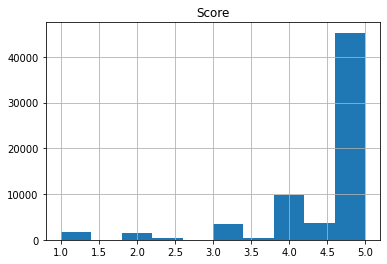

In [124]:
cleaned_df.hist()

### Clean Reviews

In [141]:
def remove_google_trans_comment(series):
    if "(Traduzido pelo Google)" in series:
        return series.replace("(Traduzido pelo Google) ","")
    else:
        return series    

In [145]:
cleaned_df.Review = cleaned_df.Review.apply(remove_google_trans_comment)

/home/jamie/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [146]:
cleaned_df.du

,Restaurant,Score,Review
0,Darshan Nepal,4.5,"Muito boa comida, boa garçonete de senhora. Pe..."
1,Darshan Nepal,4.0,Voe para Lisboa se sentir falta da autêntica c...
2,Darshan Nepal,3.5,Comida deliciosa e uma equipe muito simpática ...
3,Darshan Nepal,3.0,"Muito boa comida, boa garçonete de senhora. Pe..."
4,Darshan Nepal,2.5,Voe para Lisboa se sentir falta da autêntica c...
...,...,...,...
90663,Spice Hut Tandoori,4.0,O melhor em qualidade e boas-vindas\n\n(Origin...
90664,Spice Hut Tandoori,5.0,Bom
90665,Spice Hut Tandoori,4.0,Tratamento impecável e comida imbatível\n\n(Or...
90666,Spice Hut Tandoori,5.0,Super bom chefe\n\n(Original)\nPatron super sympa
